In [1]:
import pandas as pd
import re

#Import data
file_path = "/Users/nickponzi/Research/IMDB Dataset.csv"
data = pd.read_csv('IMDB Dataset.csv')


In [2]:
#Text preprocessing
def clean_text(text):
    text = text.lower()  
    text = re.sub(r'[^a-z\s]', '', text)  
    text = re.sub(r'\s+', ' ', text).strip()  
    return text

#Apply to the Review column

data['review'] = data['review'].apply(clean_text)

#Make sure it worked
print(data[['review']].head())

                                              review
0  one of the other reviewers has mentioned that ...
1  a wonderful little production br br the filmin...
2  i thought this was a wonderful way to spend ti...
3  basically theres a family where a little boy j...
4  petter matteis love in the time of money is a ...


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Set up TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000, min_df=2, max_df=0.95)

#Apply to review column
X_tfidf = tfidf_vectorizer.fit_transform(data['review'])

#print first 50 names to verify it worked
feature_names = tfidf_vectorizer.get_feature_names_out()
print(feature_names[:50])  


['aaron' 'abandoned' 'abc' 'abilities' 'ability' 'able' 'aboutbr'
 'absence' 'absent' 'absolute' 'absolutely' 'absurd' 'abuse' 'abused'
 'abusive' 'abysmal' 'academy' 'accent' 'accents' 'accept' 'acceptable'
 'accepted' 'access' 'accident' 'accidentally' 'accompanied'
 'accomplished' 'according' 'account' 'accuracy' 'accurate' 'accurately'
 'accused' 'achieve' 'achieved' 'achievement' 'acid' 'act' 'acted'
 'acting' 'action' 'actions' 'active' 'activities' 'actor' 'actors'
 'actress' 'actresses' 'acts' 'actual']


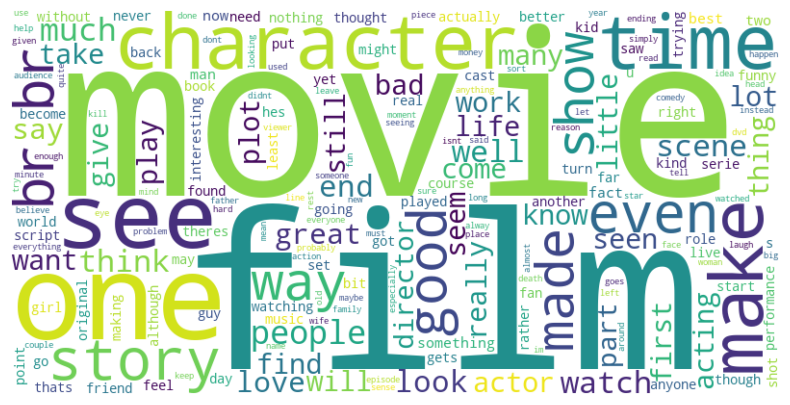

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#create word cloud for EDA
def create_word_cloud(text_data):
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(' '.join(text_data))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
create_word_cloud(data['review'])


In [5]:
from sklearn.model_selection import train_test_split

#Make sentiment binary data, either 0 or 1
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, data['sentiment'], test_size=0.2, random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

#Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

#Train the model
model.fit(X_train, y_train)

#Use the test set to predict
y_pred = model.predict(X_test)

#Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))


Accuracy: 0.8842
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.87      0.90      0.89      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [10]:
def predict_sentiment(review, model, vectorizer):
    #Preprocess the review just like the test data
    clean_review = clean_text(review)
    
    #Transform the review using the same TF-IDF vectorizer
    review_tfidf = vectorizer.transform([clean_review])
    
    #Predict the sentiment
    prediction = model.predict(review_tfidf)
    return "Positive" if prediction[0] == 1 else "Negative"

#Area to enter test reviews
new_review = "This movie is amazing!"
prediction = predict_sentiment(new_review, model, tfidf_vectorizer)
print(f"Prediction for '{new_review}': {prediction}")


Prediction for 'This movie is amazing!': Positive


In [8]:
#Movie reviews to test, from Chat GPT
reviews = [
    "Absolutely loved the storyline, it kept me on the edge of my seat!",
    "The acting was mediocre at best, wouldn't recommend.",
    "A fantastic film with stunning visuals and a gripping plot.",
    "Quite boring, I found myself checking the time often.",
    "The characters were well-developed and relatable.",
    "Terrible script, it was full of cliches and predictable twists.",
    "An emotional rollercoaster, I laughed and cried.",
    "The pacing was too slow for my liking.",
    "An instant classic, I'll definitely watch it again.",
    "Fell short of my expectations, the trailer was better.",
    "A beautiful and heartwarming story.",
    "The special effects were overdone and distracting.",
    "Amazing performances by the entire cast!",
    "The plot was all over the place, hard to follow.",
    "A delightful movie experience from start to finish.",
    "Too many plot holes, it didn't make any sense.",
    "A well-crafted film with a strong message.",
    "I couldn't connect with the characters at all.",
    "A masterpiece, every scene was artfully done.",
    "Disappointing, it lacked depth and originality.",
    "Full of thrilling action scenes, a great watch.",
    "The soundtrack was the only good part.",
    "A charming and witty comedy.",
    "The ending ruined the entire film for me.",
    "A captivating story with impressive direction."
]

#print the sentiments of test reviews
for review in reviews:
    prediction = predict_sentiment(review, model, tfidf_vectorizer)
    print(f"Review: '{review}' -> Sentiment: {prediction}")


Review: 'Absolutely loved the storyline, it kept me on the edge of my seat!' -> Sentiment: Positive
Review: 'The acting was mediocre at best, wouldn't recommend.' -> Sentiment: Negative
Review: 'A fantastic film with stunning visuals and a gripping plot.' -> Sentiment: Positive
Review: 'Quite boring, I found myself checking the time often.' -> Sentiment: Negative
Review: 'The characters were well-developed and relatable.' -> Sentiment: Negative
Review: 'Terrible script, it was full of cliches and predictable twists.' -> Sentiment: Negative
Review: 'An emotional rollercoaster, I laughed and cried.' -> Sentiment: Positive
Review: 'The pacing was too slow for my liking.' -> Sentiment: Negative
Review: 'An instant classic, I'll definitely watch it again.' -> Sentiment: Positive
Review: 'Fell short of my expectations, the trailer was better.' -> Sentiment: Negative
Review: 'A beautiful and heartwarming story.' -> Sentiment: Positive
Review: 'The special effects were overdone and distracting

In [11]:
#Mixed movie reviewed from Chat GPT
mixed_reviews = [
    "The visuals were stunning, but the plot was hard to follow.",
    "I enjoyed the first half, but the second half was a letdown.",
    "Great acting, but the story lacked depth.",
    "Some scenes were brilliant, but others were quite boring.",
    "The soundtrack was amazing, but the dialogue was cheesy.",
    "It had potential, but the execution was flawed.",
    "A rollercoaster of emotions, though it dragged at times.",
    "Interesting concept, but poorly developed characters.",
    "Loved the cinematography, but the pacing was off.",
    "Some parts were hilarious, but others were cringe-worthy.",
    "The climax was thrilling, but the ending was unsatisfying.",
    "Beautifully shot, but the plot twists were predictable.",
    "Great chemistry between the leads, but the supporting cast was weak.",
    "Innovative special effects, but the storyline was weak.",
    "The movie had heart, but it was overly sentimental.",
    "Strong opening, but it lost momentum towards the end.",
    "Compelling performances, but the script was mediocre.",
    "Visually striking, but emotionally flat.",
    "Fantastic action scenes, but the love story was forced.",
    "Engaging from the start, but fizzled out in the middle.",
    "The villain was intriguing, but the hero was bland.",
    "A unique plot, but it was poorly executed.",
    "Well-directed, but the dialogue was stilted.",
    "The film had its moments, but they were few and far between.",
    "Loved the humor, but the dramatic scenes felt out of place."
]

for review in mixed_reviews:
    prediction = predict_sentiment(review, model, tfidf_vectorizer)
    print(f"Review: '{review}' -> Sentiment: {prediction}")


Review: 'The visuals were stunning, but the plot was hard to follow.' -> Sentiment: Positive
Review: 'I enjoyed the first half, but the second half was a letdown.' -> Sentiment: Positive
Review: 'Great acting, but the story lacked depth.' -> Sentiment: Positive
Review: 'Some scenes were brilliant, but others were quite boring.' -> Sentiment: Negative
Review: 'The soundtrack was amazing, but the dialogue was cheesy.' -> Sentiment: Positive
Review: 'It had potential, but the execution was flawed.' -> Sentiment: Negative
Review: 'A rollercoaster of emotions, though it dragged at times.' -> Sentiment: Positive
Review: 'Interesting concept, but poorly developed characters.' -> Sentiment: Negative
Review: 'Loved the cinematography, but the pacing was off.' -> Sentiment: Positive
Review: 'Some parts were hilarious, but others were cringe-worthy.' -> Sentiment: Positive
Review: 'The climax was thrilling, but the ending was unsatisfying.' -> Sentiment: Positive
Review: 'Beautifully shot, but th